###📥 **Import Libraries**

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

# common library
import numpy as np
import matplotlib.pyplot as plt

# tensor computation
from tensorflow.random import set_seed
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

###🔒 **Inisialisasi Bilangan Random**

In [ ]:
def set_random(seed):
  np.random.seed(seed)
  set_seed(seed)

set_random(2022)

###📚 **Persiapan Environtment**

In [ ]:
# file directory
file_dir = '/content/drive/Shareddrives/Teman Tapi Mining/Satria Data/2022/'
data_dir = 'data/Garbage classification/Garbage classification/'
dir = file_dir + data_dir

# train generator
train = ImageDataGenerator(
    horizontal_flip = True, vertical_flip = True,
    validation_split = 0.1, rescale = 1./255,
    shear_range = 0.1, zoom_range = 0.1,
    width_shift_range = 0.1, height_shift_range = 0.1
    )
train_generator = train.flow_from_directory(
    dir, target_size = (512, 384), batch_size = 32,
    class_mode = 'categorical', subset = 'training'
    )

# test generator
test = ImageDataGenerator(rescale = 1./255, validation_split = 0.1)
test_generator = test.flow_from_directory(
    dir, target_size = (512, 384), batch_size = 32,
    class_mode = 'categorical', subset = 'validation'
    )

# define classes
class_ = dict((value, key) for key, value in train_generator.class_indices.items())

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [ ]:
# persiapan model
model = load_model(file_dir + 'model/ResNet152V2.h5')
X_test, y_test = test_generator.__getitem__(1)
y_pred = model.predict(X_test)

1/1 [==============================] - 37s 37s/step


###🔰 **Hasil Prediksi**

In [ ]:
img_fit = test.flow_from_directory(dir, target_size = (384, 512), batch_size = 32, class_mode = 'categorical', subset = 'validation')
img_feature, img_test = img_fit.__getitem__(1)
img_pred = model.predict(img_feature)

Found 251 images belonging to 6 classes.
1/1 [==============================] - 35s 35s/step


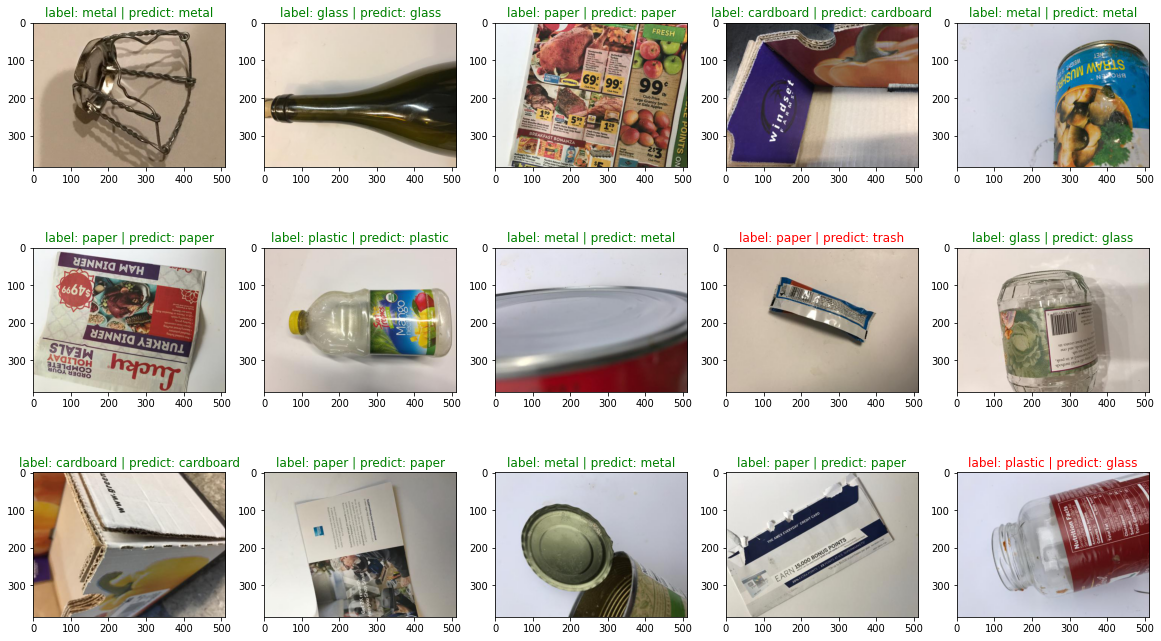

In [ ]:
plt.figure(figsize = (20, 20))
for i in range(15):
  plt.subplot(5, 5, i + 1)
  label, pred = class_[np.argmax(img_pred[i])], class_[np.argmax(img_test[i])]
  font = {'color': 'red'} if label != pred else {'color': 'green'}
  plt.title(f'label: {label} | predict: {pred}', fontdict = font);
  plt.imshow(img_feature[i])